# To make a collage of 4 picture

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image

image = Image.open('Img/index.jpg')
image1 = Image.open('Img/index1.jpg')
image2 = Image.open('Img/index2.jpeg')
image3 = Image.open('Img/index3.png')

In [5]:
img1 = image.resize((200, 200),Image.ANTIALIAS)
img2= image1.resize((200,200))
img3= image2.resize((200,200))
img4= image3.resize((200,200))

In [6]:
img1.show()

In [10]:
i=np.hstack((img1,img2))
j=np.hstack((img3,img4))

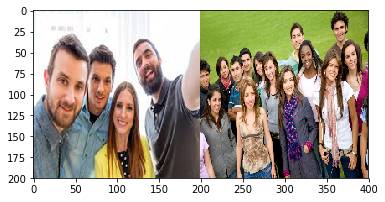

In [11]:
plt.imshow(i)

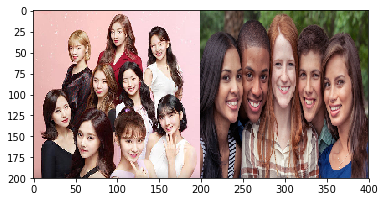

In [12]:
plt.imshow(j)

In [13]:
z=np.vstack((i,j))

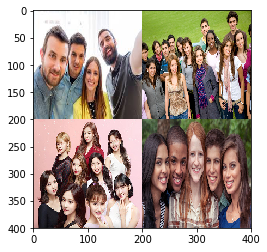

In [14]:
plt.imshow(z)

# Face detection Using OpenCV
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library.

In [ ]:
pip install opencv-python

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
image = plt.imread('Img/index1.jpg')

-1

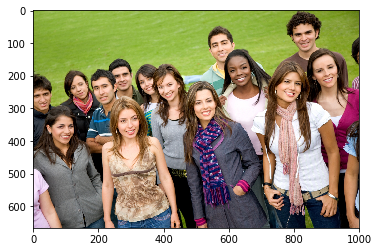

In [13]:
plt.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

HaarCascade file- is an xml file. This file will help us to detect faces.Haar Cascade is a machine learning object detection algorithm used to identify objects in an image or video and based on the concept of features proposed by Paul Viola and Michael Jones.
<br>
<br>
Read more about it on http://www.willberger.org/cascade-haar-explained/
<br>
The file can be downloaded on https://www.dropbox.com/s/5o64ru428jlb29g/haarcascade_frontalface_alt.xml?dl=0

In [14]:
# Load the cascade file
detector=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

CascadeClassifier::detectMultiScale-Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [15]:
faces=detector.detectMultiScale(image)

In [16]:
faces

array([[787,  40,  86,  86],
       [ 63, 328,  76,  76],
       [534,  73,  79,  79],
       [239, 174,  68,  68],
       [756, 192,  79,  79],
       [173, 209,  72,  72],
       [372, 205,  69,  69],
       [589, 146,  83,  83],
       [853, 144,  92,  92],
       [  1, 241,  57,  57],
       [485, 250,  82,  82],
       [253, 305,  83,  83]], dtype=int32)

In [17]:
faces.shape

(12, 4)

This implies that it detected 12 faces and 4 represents that there are 4 properties.

In [18]:
faces[0]

array([787,  40,  86,  86], dtype=int32)

Here the first face has 4 properties: 
    787-x coordinate
    40-y coordinate
    86-width of the rectangle
    86-height of the rectangle

# Plotting a rectangle on one faces

In [19]:
x,y,w,h=faces[0]

cv2.rectangle() method is used to draw a rectangle on any image.
<br>
<br>
cv2.rectangle(image, start_point, end_point, color, thickness)
<br>
<b>image: </b>It is the image on which rectangle is to be drawn.
<br>
<b>start_point:</b> It is the starting coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
<br>
<b>end_point:</b> It is the ending coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
color: It is the color of border line of rectangle to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
<br>
<b>thickness:</b> It is the thickness of the rectangle border line in px. Thickness of -1 px will fill the rectangle shape by the specified color.
It returns an image.

In [23]:
img=cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),2)

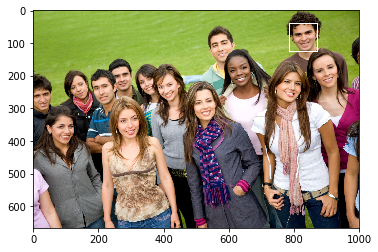

In [24]:
plt.imshow(img)

# Plotting a rectangle on the faces

In [32]:
for face in faces:
    x,y,w,h=face
    img=cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)

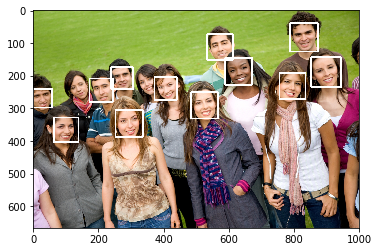

In [33]:
plt.imshow(img)

# Eye detection using OpenCV

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
image = plt.imread('Img/index1.jpg')

-1

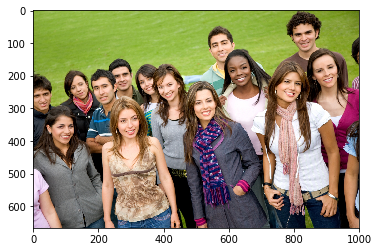

In [58]:
plt.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [64]:
# Load the cascade file
eye_detector=cv2.CascadeClassifier("haarcascade_eye.xml")

In [60]:
eyes=eye_detector.detectMultiScale(image)

In [61]:
for eye in eyes:
    x,y,w,h=eye
    img=cv2.rectangle(image,(x,y),(x+w,y+h),(128,0,128),3)

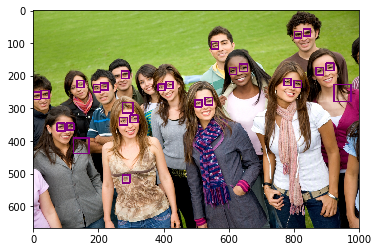

In [62]:
plt.imshow(img)

Similarly, we can detect faces in videos. As you know videos are basically made up of frames, which are still images. So we perform the face detection for each frame in a video.

In [ ]:
import cv2

In [ ]:
# Load the cascade
detector=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

In [ ]:
# To capture video from webcam. 
cap = cv2.VideoCapture(0)

In [ ]:
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

In [ ]:
while True:
    # Read the frame
    _, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    face = detector.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in face:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    cv2.imshow('img', img)
    
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

In [ ]:
# Release the VideoCapture object
cap.release()